# Cardiac - Constrained

In [1]:
%pylab inline

import sigpy as sp
from demo_cardiac_constrained import *

import matplotlib as mpl
from matplotlib.lines import Line2D
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\boldmath'
markers = Line2D.filled_markers
mpl.rc('font', weight='bold')

Populating the interactive namespace from numpy and matplotlib


In [2]:
trj = np.load("data/cardiac/trj.npy").real

In [3]:
W = sp.linop.Wavelet((316, 317))

In [4]:
cg_time = [np.load("results/cardiac_constrained/cg_nn_%02d/time.npy" % elm) for elm in cg_num_normal]
cg_obj  = [np.load("results/cardiac_constrained/cg_nn_%02d/obj.npy"  % elm) for elm in cg_num_normal]
cg_dc   = [np.load("results/cardiac_constrained/cg_nn_%02d/dc.npy"   % elm) for elm in cg_num_normal] 
cg_rec  = [W.H(np.load("results/cardiac_constrained/cg_nn_%02d/iter_%03d.npy" % (elm, num_iters - 1))) for elm in cg_num_normal]

In [5]:
pi_time = [np.load("results/cardiac_constrained/pi_nn_%02d/time.npy" % elm) for elm in pi_num_normal]
pi_obj  = [np.load("results/cardiac_constrained/pi_nn_%02d/obj.npy"  % elm) for elm in pi_num_normal]
pi_dc   = [np.load("results/cardiac_constrained/pi_nn_%02d/dc.npy"   % elm) for elm in pi_num_normal] 
pi_rec  = [W.H(np.load("results/cardiac_constrained/pi_nn_%02d/iter_%03d.npy" % (elm, num_iters - 1))) for elm in pi_num_normal]

In [6]:
max_time = max([elm.max() for elm in cg_time] + [elm.max() for elm in pi_time])

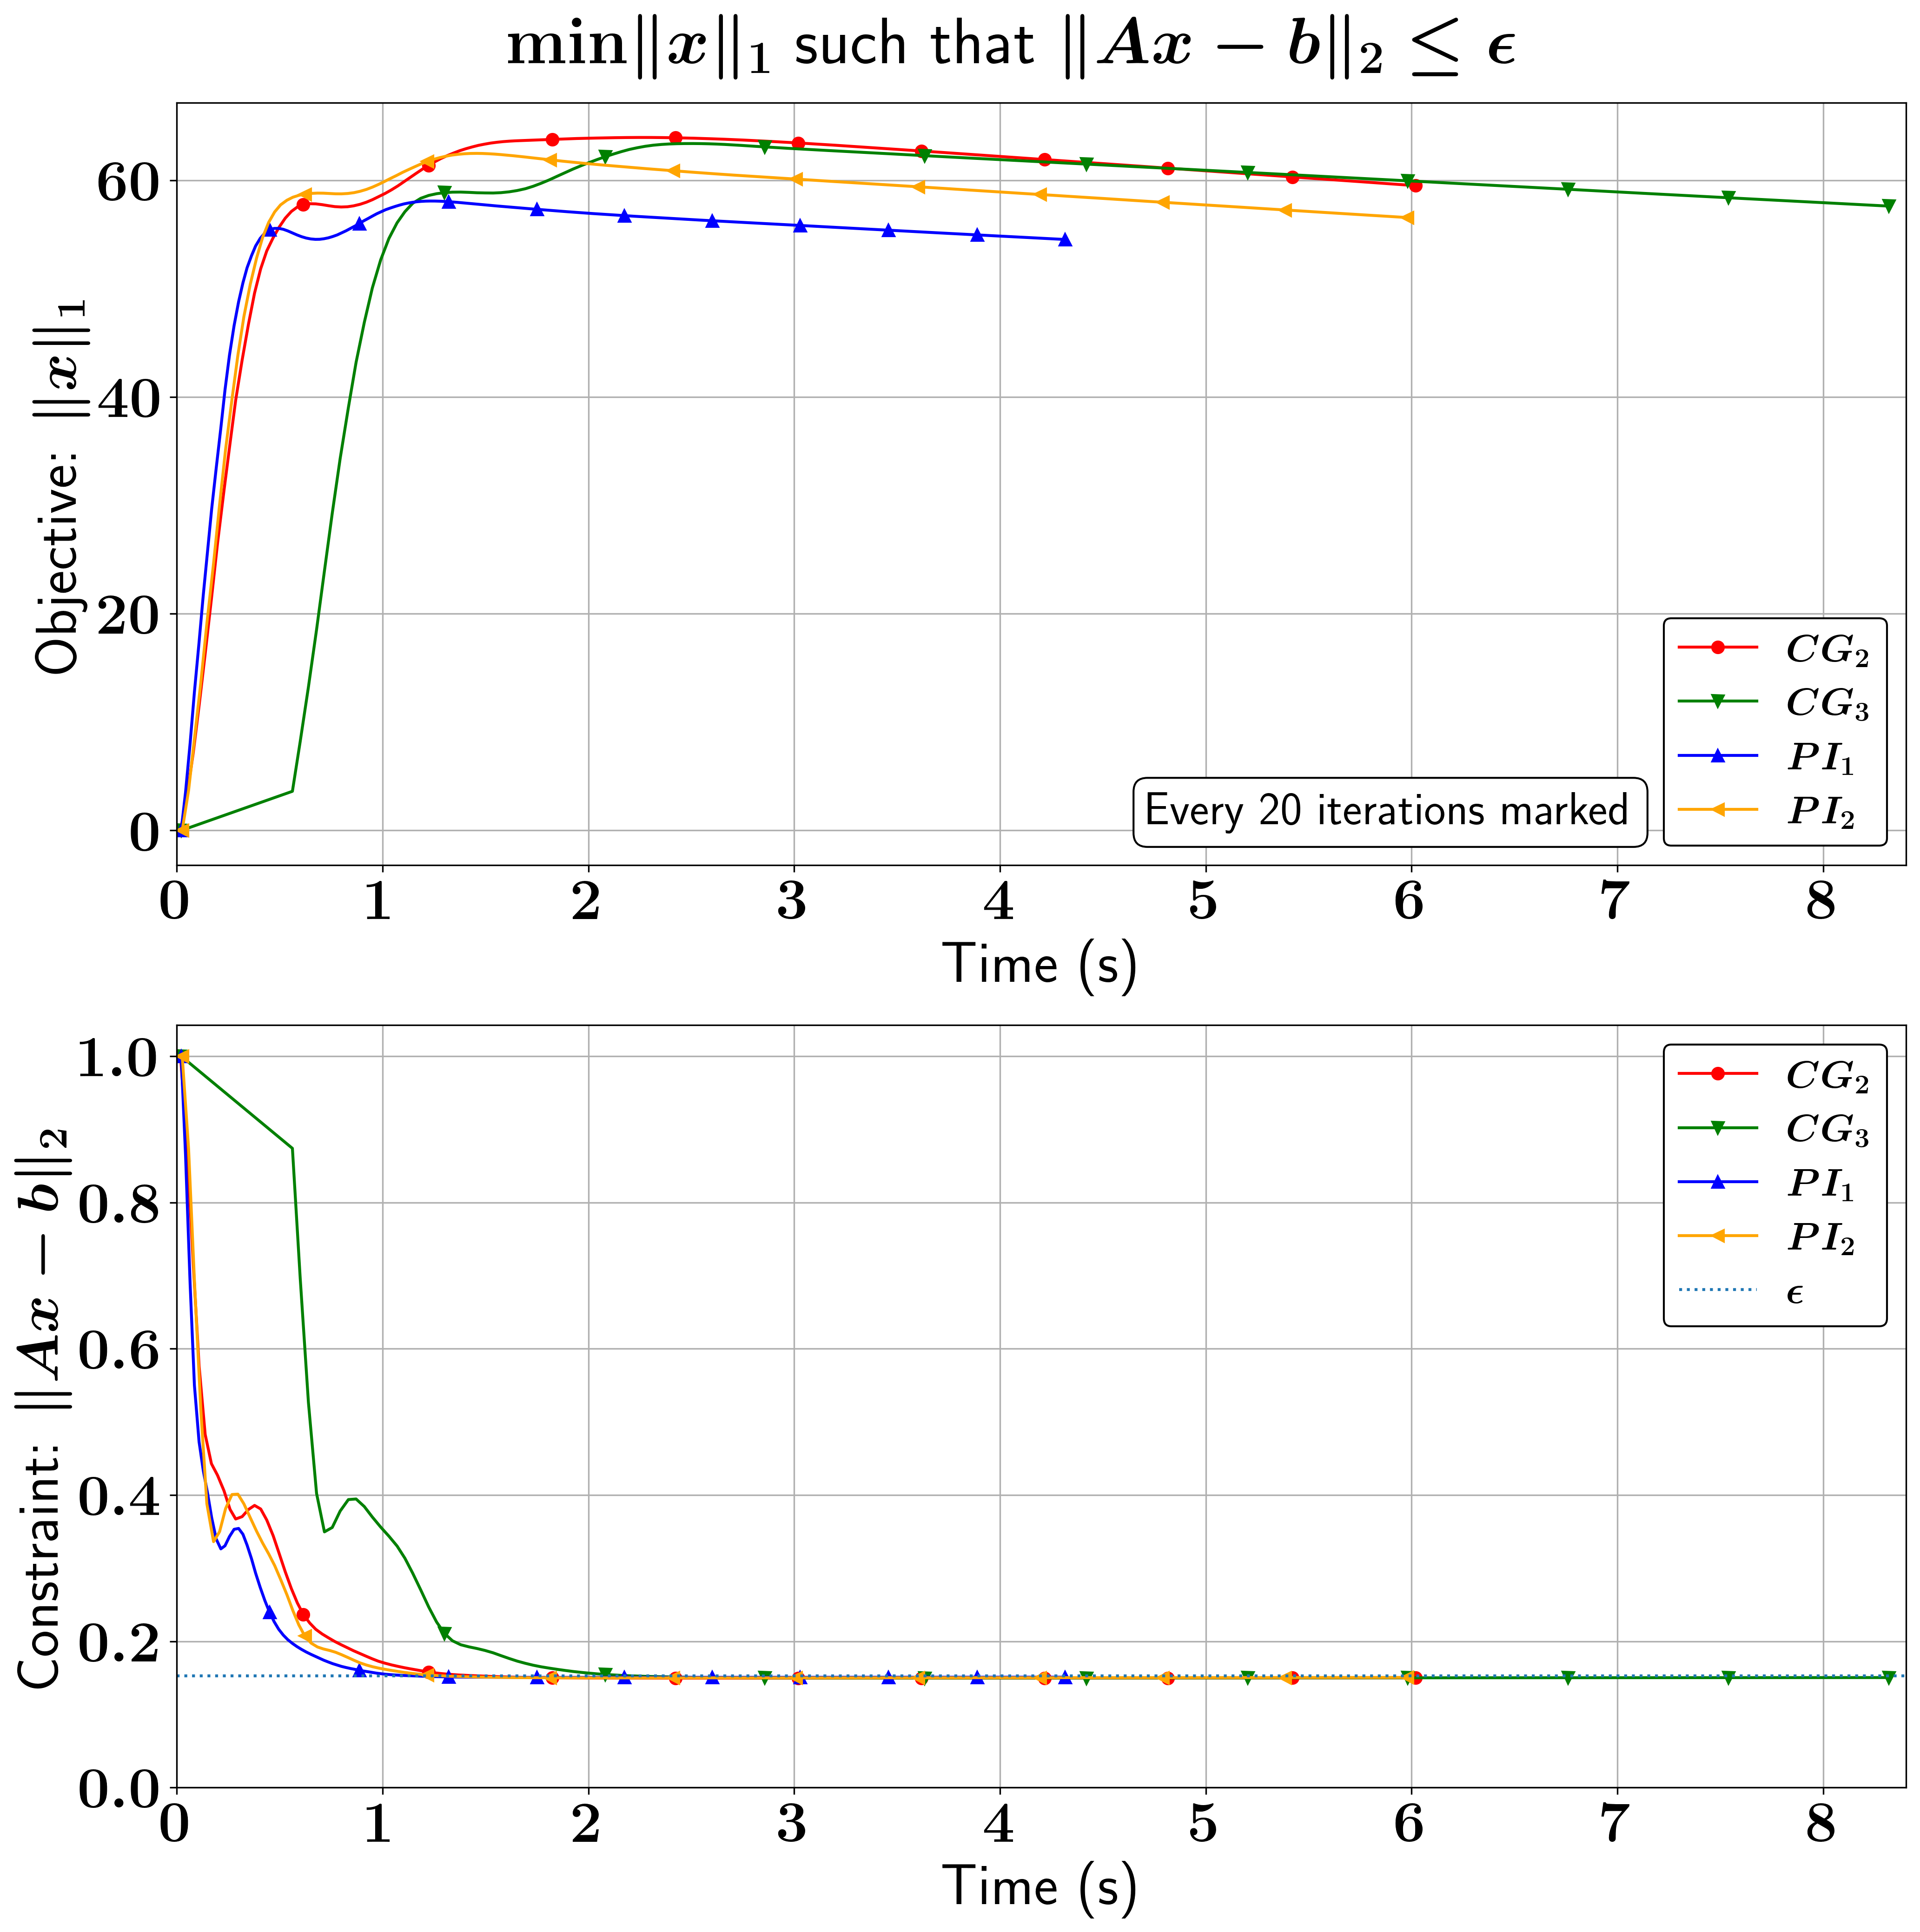

In [7]:
(fig, ax) = plt.subplots(2, 1, figsize=(16, 16), dpi=300)

markevery=(num_iters-1)//10
alpha = 0.7

colors = ["red", "green", "blue", "orange"]

ax_top = ax[0]
ax_bot = ax[1]

legend = []
for k in range(len(cg_num_normal)):
    ax_top.plot(cg_time[k], cg_obj[k], marker=markers[k], markevery=markevery, color=colors[k])
    ax_bot.plot(cg_time[k], cg_dc[k],  marker=markers[k], markevery=markevery, color=colors[k])
    legend.append(r"$\boldsymbol{CG_{%d}}$" % cg_num_normal[k])
    
for k in range(len(pi_num_normal)):
    ax_top.plot(pi_time[k], pi_obj[k], marker=markers[k + len(cg_num_normal)], markevery=markevery, color=colors[k + len(cg_num_normal)])
    ax_bot.plot(pi_time[k], pi_dc[k],  marker=markers[k + len(cg_num_normal)], markevery=markevery, color=colors[k + len(cg_num_normal)])
    legend.append(r"$\boldsymbol{PI_{%d}}$" % pi_num_normal[k])
    
ax_bot.axhline(y=eps, linestyle=":")
ax_bot.set_ylim([0, None])

ax_top.set_xlabel(r"Time (s)", fontsize=30)
ax_bot.set_xlabel(r"Time (s)", fontsize=30)

ax_top.set_ylabel(r"Objective: $\boldsymbol{\lVert x \rVert_1}$",     fontsize=30)
ax_bot.set_ylabel(r"Constraint: $\boldsymbol{\lVert Ax-b \rVert_2}$", fontsize=30)

ax_top.legend(legend,                                fontsize=20, edgecolor="black", facecolor="white", loc="lower right", framealpha=1)
ax_bot.legend(legend + [r"$\boldsymbol{\epsilon}$"], fontsize=20, edgecolor="black", facecolor="white", loc="upper right", framealpha=1)

ax_top.grid()
ax_bot.grid()

fig.text(0.56, 0.562, "Every %d iterations marked" % markevery, va='center', rotation='horizontal', fontsize=24, bbox=dict(facecolor="w", edgecolor="black", boxstyle='round'))

  
ax_top.set_xlim([0, max_time * 1.01])
ax_bot.set_xlim([0, max_time * 1.01])

ax_top.tick_params(labelsize=30)
ax_bot.tick_params(labelsize=30)
              
plt.subplots_adjust(hspace=0.21)

plt.suptitle(r"$\min \lVert x \rVert_1$ such that $\lVert Ax - b\rVert_2 \leq \epsilon$", fontsize=34, y=0.92)

plt.savefig('figures/cardiac_c.png')
!convert -trim figures/cardiac_c.png figures/cardiac_c.png

Done.